In [543]:
import pandas as pd

# Load the CSV and Excel files to understand their structure and content
solar_data = pd.read_csv('../DATA/solar.csv')
sunrise_sunset_data = pd.read_excel('../DATA/sunrise-sunset.xlsx')
weather_data = pd.read_csv('../DATA/weather.csv')

# Displaying the first few rows of each dataset to understand their structure
solar_data_head = solar_data.head()
sunrise_sunset_data_head = sunrise_sunset_data.head()
weather_data_head = weather_data.head()

solar_data_head, sunrise_sunset_data_head, weather_data_head


(                       timestamp   kwh
 0  2023-03-11 16:00:10.160454+01  0.54
 1  2023-03-11 17:00:10.217795+01  1.02
 2  2023-03-11 18:00:10.284064+01  1.17
 3  2023-03-11 19:00:10.224836+01  1.18
 4  2023-03-11 20:00:10.201847+01  1.18,
        datum   Opkomst Op ware middag Ondergang
 0 2023-01-01  08:45:00       12:46:00  16:47:00
 1 2023-01-02  08:45:00       12:46:00  16:48:00
 2 2023-01-03  08:45:00       12:47:00  16:49:00
 3 2023-01-04  08:44:00       12:47:00  16:51:00
 4 2023-01-05  08:44:00       12:48:00  16:52:00,
                                       FID                    the_geom  code  \
 0  synop_data.6407.2023-02-28 23:00:00+00  POINT (51.200341 2.887306)  6407   
 1  synop_data.6418.2023-02-28 23:00:00+00  POINT (51.347375 3.201846)  6418   
 2  synop_data.6414.2023-02-28 23:00:00+00   POINT (50.90398 3.121692)  6414   
 3  synop_data.6434.2023-02-28 23:00:00+00  POINT (50.980293 3.816003)  6434   
 4  synop_data.6434.2023-03-01 00:00:00+00  POINT (50.980293 3.8

In [544]:

# Check for missing values and review summary statistics for each dataset
missing_solar = solar_data.isnull().sum()
stats_solar = solar_data.describe()

missing_sunrise_sunset = sunrise_sunset_data.isnull().sum()
stats_sunrise_sunset = sunrise_sunset_data.describe()

missing_weather = weather_data.isnull().sum()
stats_weather = weather_data.describe()

missing_solar, stats_solar, missing_sunrise_sunset, stats_sunrise_sunset, missing_weather, stats_weather


(timestamp    0
 kwh          0
 dtype: int64,
                kwh
 count  7907.000000
 mean   1222.790435
 std     707.659230
 min       0.000000
 25%     547.675800
 50%    1444.772000
 75%    1897.269400
 max    2043.015400,
 datum             0
 Opkomst           0
 Op ware middag    0
 Ondergang         0
 dtype: int64,
                      datum
 count                  731
 mean   2024-01-01 00:00:00
 min    2023-01-01 00:00:00
 25%    2023-07-02 12:00:00
 50%    2024-01-01 00:00:00
 75%    2024-07-01 12:00:00
 max    2024-12-31 00:00:00,
 FID                                0
 the_geom                           0
 code                               0
 timestamp                          0
 precip_quantity                27477
 precip_range                   27365
 temp                               0
 temp_min                       31440
 temp_max                       31447
 temp_grass_min                 31788
 wind_speed                        13
 wind_speed_unit              

C:\Users\tomde\AppData\Local\Temp\ipykernel_17484\3401057051.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])


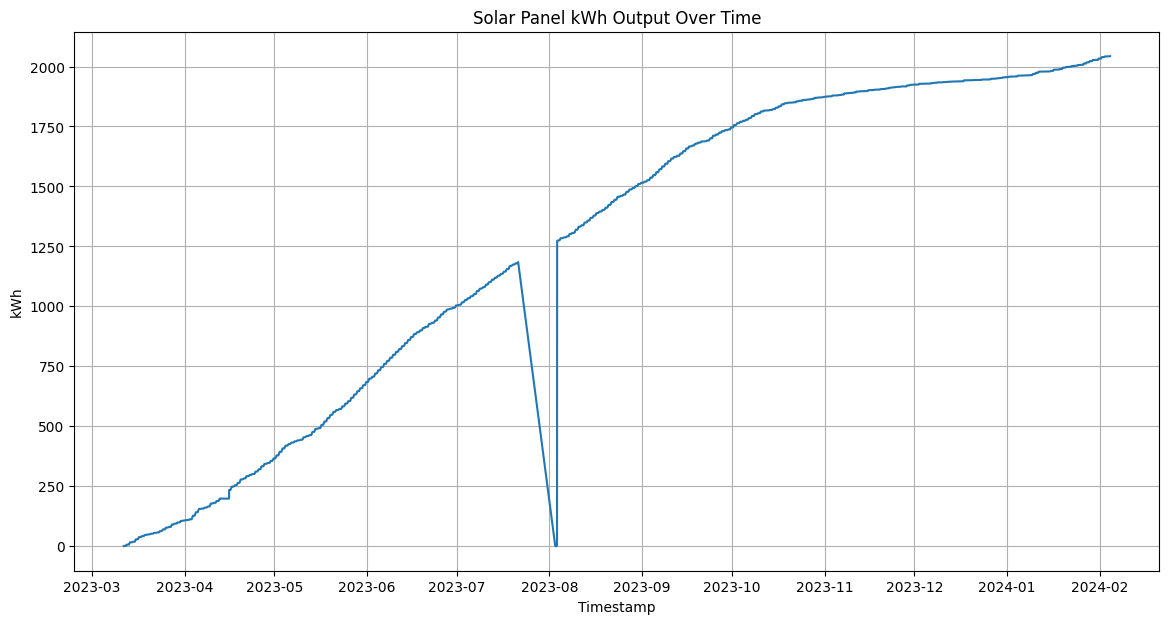

In [545]:
import matplotlib.pyplot as plt

# Plotting the kWh output to inspect for any obvious outliers or unusual patterns
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(solar_data['timestamp']), solar_data['kwh'])
plt.title('Solar Panel kWh Output Over Time')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()


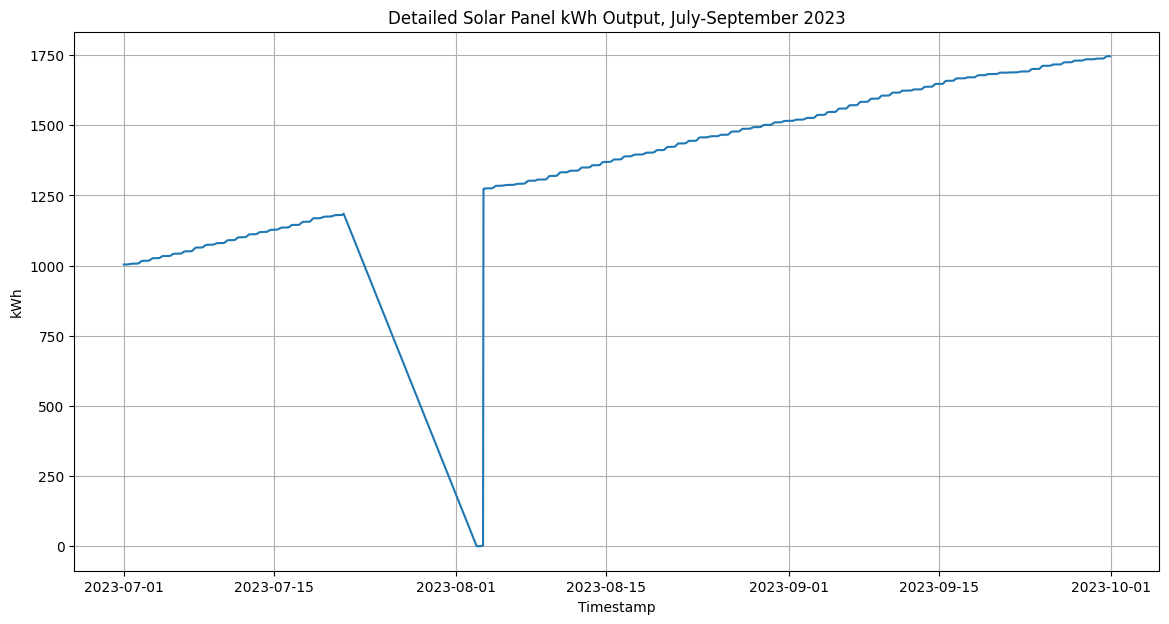

In [546]:
# Converting timestamps to UTC
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'], utc=True)

#filtering for July to September 2023
filtered_solar_data = solar_data[(solar_data['timestamp'].dt.month >= 7) & 
                                 (solar_data['timestamp'].dt.month <= 9) &
                                 (solar_data['timestamp'].dt.year == 2023)]

# Replotting the detailed data for this period
plt.figure(figsize=(14, 7))
plt.plot(filtered_solar_data['timestamp'], filtered_solar_data['kwh'])
plt.title('Detailed Solar Panel kWh Output, July-September 2023')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()


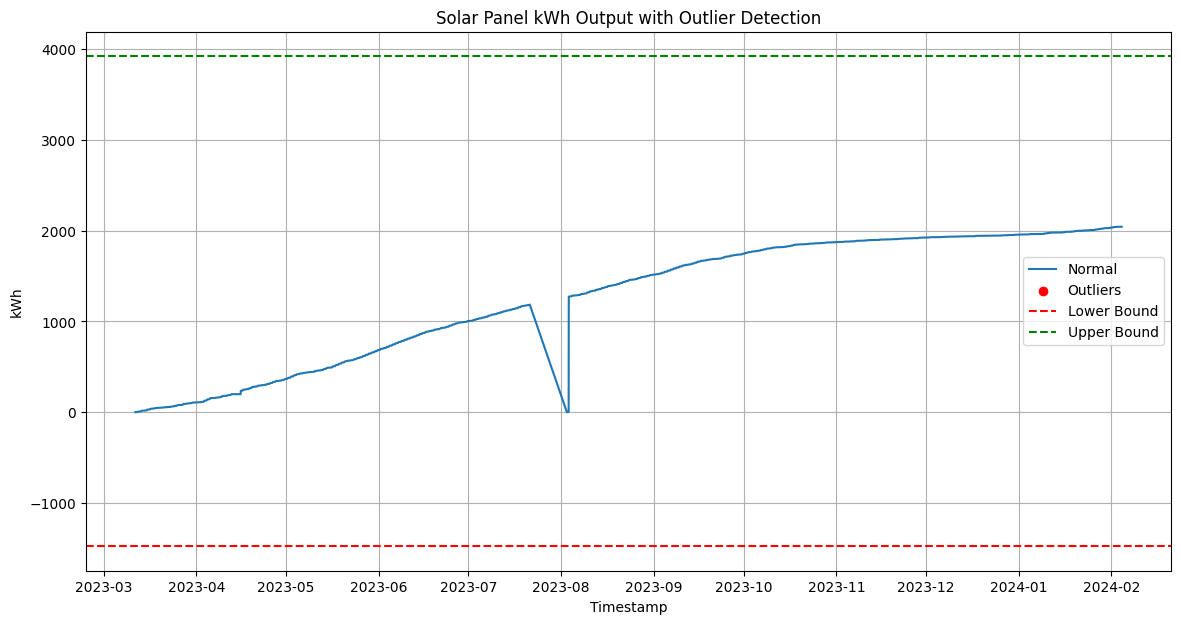

(0, -1476.7145999999998, 3921.6597999999994)

In [547]:
# Calculate the IQR for kWh output
Q1 = solar_data['kwh'].quantile(0.25)
Q3 = solar_data['kwh'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those values outside 1.5 times the IQR from the Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the dataset
outliers = solar_data[(solar_data['kwh'] < lower_bound) | (solar_data['kwh'] > upper_bound)]

# Plotting to visualize the normal range and outliers
plt.figure(figsize=(14, 7))
plt.plot(solar_data['timestamp'], solar_data['kwh'], label='Normal')
plt.scatter(outliers['timestamp'], outliers['kwh'], color='red', label='Outliers')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.title('Solar Panel kWh Output with Outlier Detection')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.legend()
plt.grid(True)
plt.show()

# Return the number of identified outliers and bounds
outliers_count = outliers.shape[0], lower_bound, upper_bound
outliers_count


In [548]:
# Checking the time intervals for the weather data and sunrise-sunset data
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], utc=True)
weather_data_resample_check = weather_data['timestamp'].diff().describe()

sunrise_sunset_data['datum'] = pd.to_datetime(sunrise_sunset_data['datum'], utc=True)
sunrise_sunset_resample_check = sunrise_sunset_data['datum'].diff().describe()

weather_data_resample_check, sunrise_sunset_resample_check


(count                        32807
 mean     0 days 00:14:59.917700490
 std      0 days 00:25:58.821965912
 min                0 days 00:00:00
 25%                0 days 00:00:00
 50%                0 days 00:00:00
 75%                0 days 00:00:00
 max                0 days 01:00:00
 Name: timestamp, dtype: object,
 count                730
 mean     1 days 00:00:00
 std      0 days 00:00:00
 min      1 days 00:00:00
 25%      1 days 00:00:00
 50%      1 days 00:00:00
 75%      1 days 00:00:00
 max      1 days 00:00:00
 Name: datum, dtype: object)

In [549]:

# Assuming 'weather_data' is already loaded
# Convert all columns that should be numeric but are objects
numeric_cols = weather_data.columns[weather_data.dtypes == 'object']
for col in numeric_cols:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')

# Now resample the data, automatically excluding any remaining non-numeric columns
weather_data_hourly = weather_data.set_index('timestamp').resample('h').mean()

# Reset the index
weather_data_hourly.reset_index(inplace=True)

# Preview the resampled data
print(weather_data_hourly.head())



                  timestamp  FID  the_geom     code  precip_quantity  \
0 2023-02-28 23:00:00+00:00  NaN       NaN  6418.25              NaN   
1 2023-03-01 00:00:00+00:00  NaN       NaN  6418.25              0.0   
2 2023-03-01 01:00:00+00:00  NaN       NaN  6418.25              NaN   
3 2023-03-01 02:00:00+00:00  NaN       NaN  6418.25              NaN   
4 2023-03-01 03:00:00+00:00  NaN       NaN  6418.25              NaN   

   precip_range   temp  temp_min  temp_max  temp_grass_min  ...  \
0           NaN  0.350       NaN       NaN             NaN  ...   
1           1.0  0.850       NaN       NaN             NaN  ...   
2           NaN  0.450       NaN       NaN             NaN  ...   
3           NaN  0.725       NaN       NaN             NaN  ...   
4           NaN -0.075       NaN       NaN             NaN  ...   

   wind_speed_unit  wind_direction  wind_peak_speed  humidity_relative  \
0              1.0          32.675             4.15          70.900000   
1              1

In [550]:
# Convert times to string and then combine with date strings for proper datetime conversion
sunrise_sunset_data['Opkomst'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Opkomst'].astype(str))
sunrise_sunset_data['Ondergang'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Ondergang'].astype(str))

# If the original data times are in local time, convert to UTC for consistency (adjust timezone if known)
sunrise_sunset_data['Opkomst'] = sunrise_sunset_data['Opkomst'].dt.tz_convert('UTC')
sunrise_sunset_data['Ondergang'] = sunrise_sunset_data['Ondergang'].dt.tz_convert('UTC')

# Display the updated data to ensure the conversions are correct
sunrise_sunset_data_head_updated = sunrise_sunset_data.head()

sunrise_sunset_data_head_updated




C:\Users\tomde\AppData\Local\Temp\ipykernel_17484\610579339.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunrise_sunset_data['Opkomst'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Opkomst'].astype(str))
C:\Users\tomde\AppData\Local\Temp\ipykernel_17484\610579339.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunrise_sunset_data['Ondergang'] = pd.to_datetime(sunrise_sunset_data['datum'].astype(str) + ' ' + sunrise_sunset_data['Ondergang'].astype(str))


,datum,Opkomst,Op ware middag,Ondergang
0,2023-01-01 00:00:00+00:00,2023-01-01 08:45:00+00:00,12:46:00,2023-01-01 16:47:00+00:00
1,2023-01-02 00:00:00+00:00,2023-01-02 08:45:00+00:00,12:46:00,2023-01-02 16:48:00+00:00
2,2023-01-03 00:00:00+00:00,2023-01-03 08:45:00+00:00,12:47:00,2023-01-03 16:49:00+00:00
3,2023-01-04 00:00:00+00:00,2023-01-04 08:44:00+00:00,12:47:00,2023-01-04 16:51:00+00:00
4,2023-01-05 00:00:00+00:00,2023-01-05 08:44:00+00:00,12:48:00,2023-01-05 16:52:00+00:00


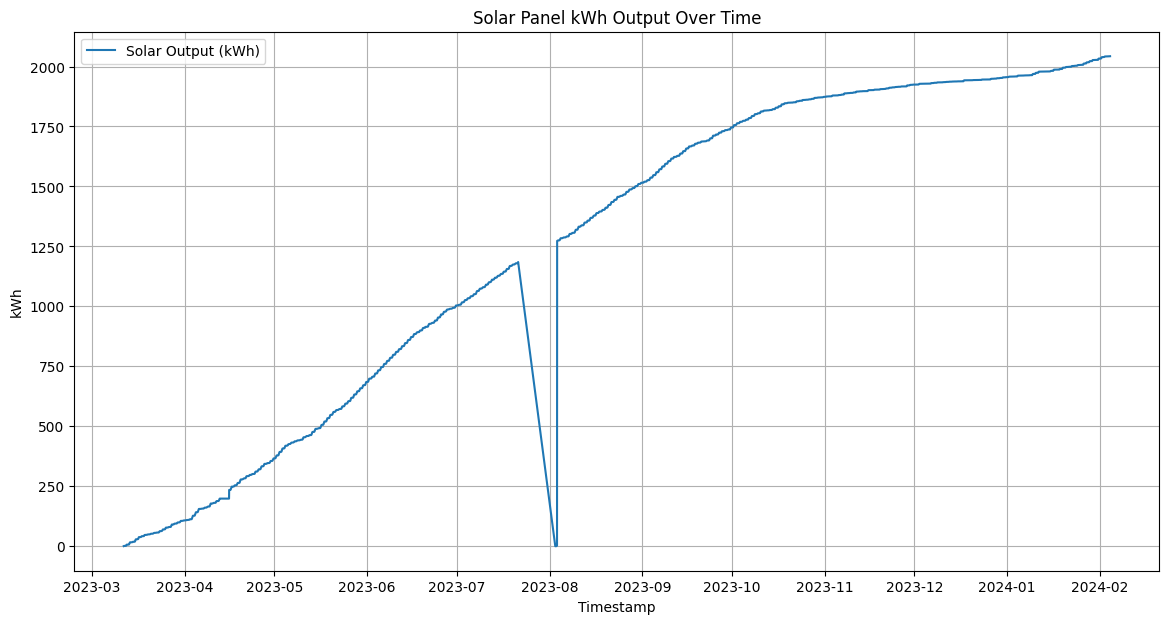

In [551]:
import matplotlib.pyplot as plt

# Replot the solar output over time
plt.figure(figsize=(14, 7))
plt.plot(solar_data['timestamp'], solar_data['kwh'], label='Solar Output (kWh)')
plt.title('Solar Panel kWh Output Over Time')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.legend()
plt.show()


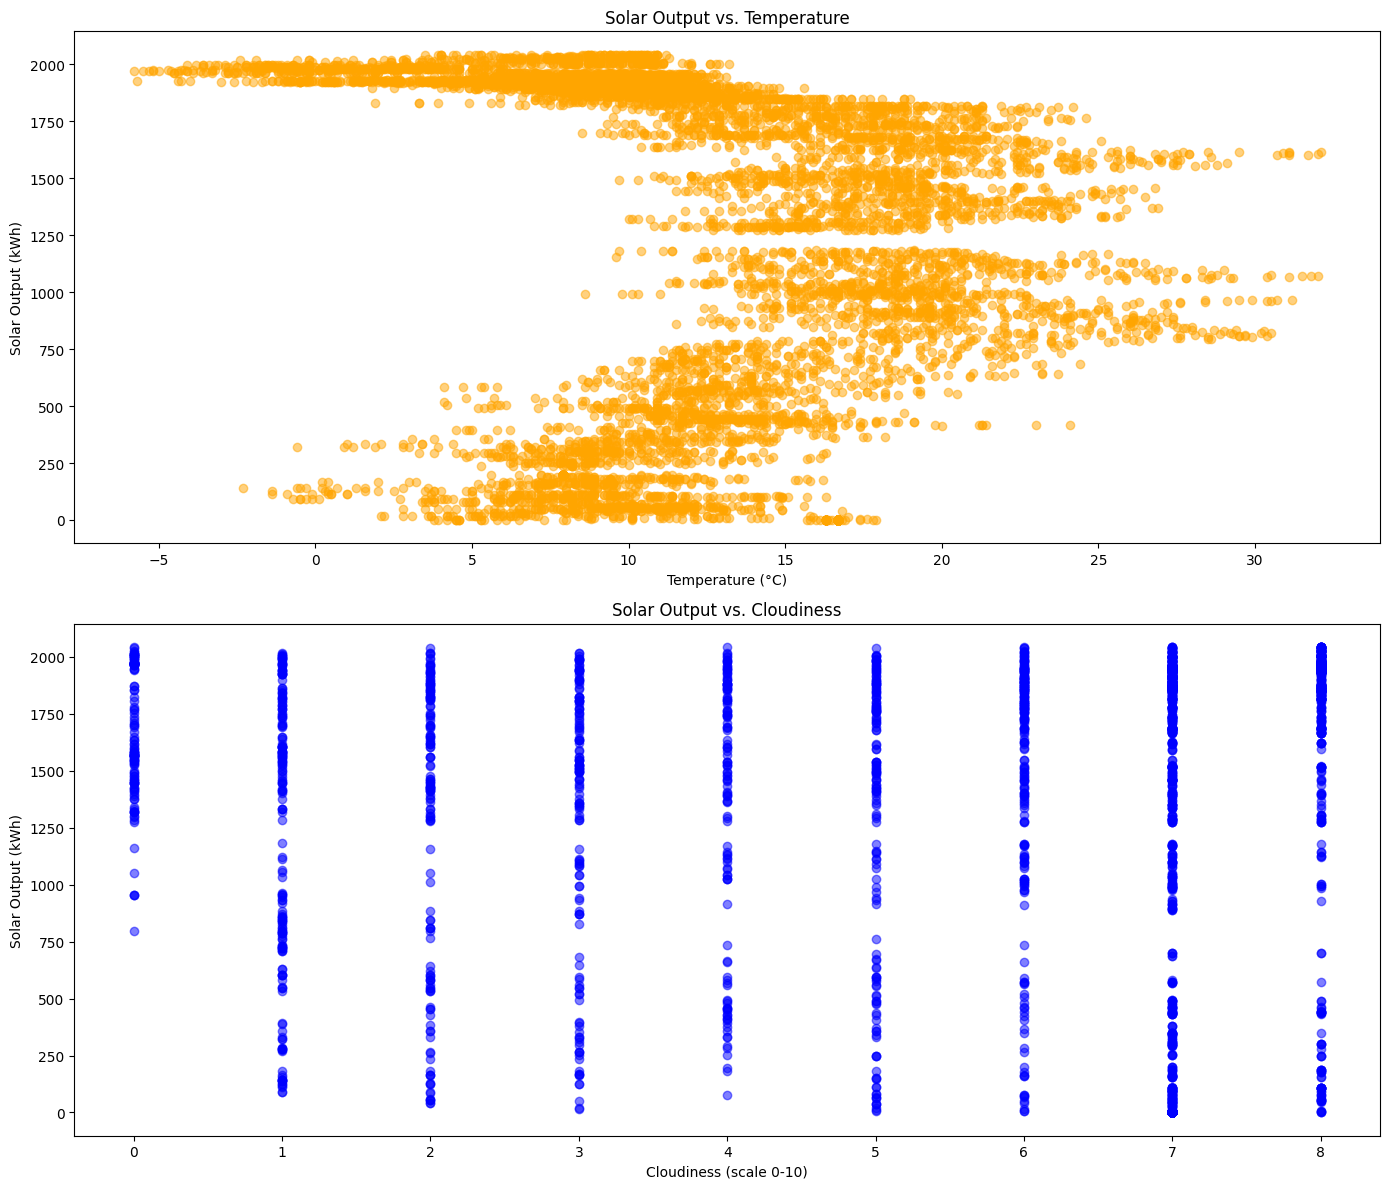

In [552]:
# Since the weather data may not align perfectly with solar data timestamps, use 'merge_asof' to align them closely based on time.
# First, sort the data by timestamp
solar_data_sorted = solar_data.sort_values('timestamp')
weather_data_sorted = weather_data.sort_values('timestamp')

# Merge the closest timestamps
merged_data = pd.merge_asof(solar_data_sorted, weather_data_sorted, on='timestamp', direction='nearest')

# Plot solar output vs. temperature and cloud cover
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Temperature vs. Solar Output
axs[0].scatter(merged_data['temp'], merged_data['kwh'], alpha=0.5, color='orange')
axs[0].set_title('Solar Output vs. Temperature')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Solar Output (kWh)')

# Cloudiness vs. Solar Output
axs[1].scatter(merged_data['cloudiness'], merged_data['kwh'], alpha=0.5, color='blue')
axs[1].set_title('Solar Output vs. Cloudiness')
axs[1].set_xlabel('Cloudiness (scale 0-10)')
axs[1].set_ylabel('Solar Output (kWh)')

plt.tight_layout()
plt.show()


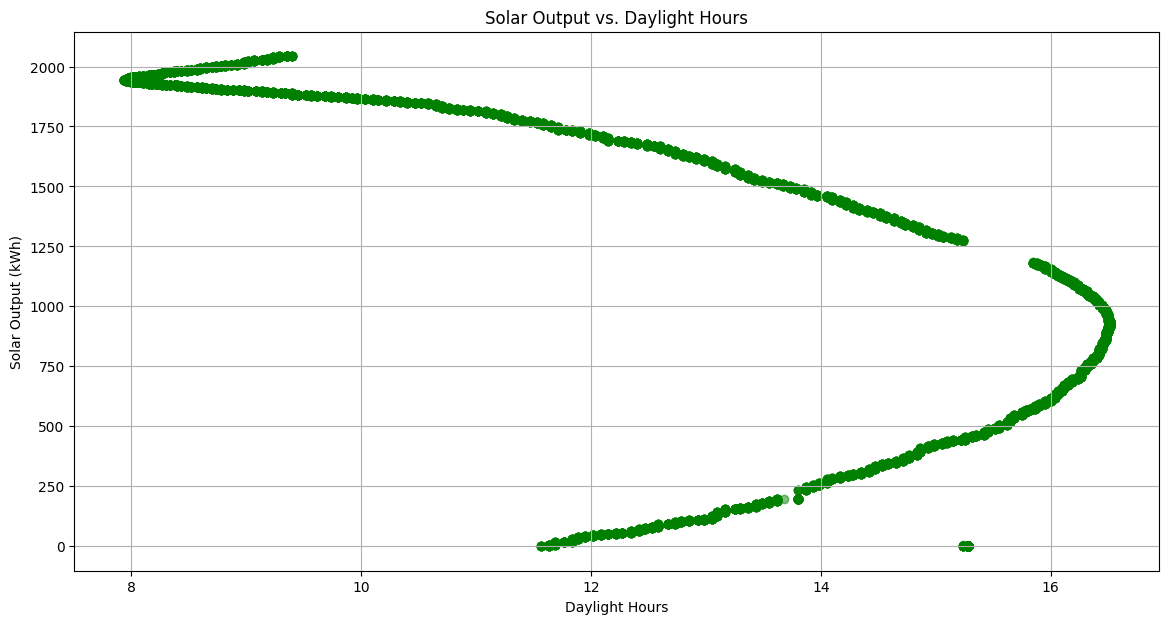

In [553]:
# Merge solar data with sunrise-sunset data to include daylight hours
# We need to merge based on the date extracted from the timestamp of solar data and the 'datum' from sunrise-sunset data
solar_data_sorted['date'] = solar_data_sorted['timestamp'].dt.date
sunrise_sunset_data['date'] = sunrise_sunset_data['datum'].dt.date

# Calculate daylight hours for each day
sunrise_sunset_data['daylight_hours'] = (sunrise_sunset_data['Ondergang'] - sunrise_sunset_data['Opkomst']).dt.total_seconds() / 3600


# Merging based on the date
merged_daylight_data = pd.merge(solar_data_sorted, sunrise_sunset_data[['date', 'daylight_hours']], on='date', how='left')

# Plotting Solar Output vs. Daylight Hours
plt.figure(figsize=(14, 7))
plt.scatter(merged_daylight_data['daylight_hours'], merged_daylight_data['kwh'], alpha=0.5, color='green')
plt.title('Solar Output vs. Daylight Hours')
plt.xlabel('Daylight Hours')
plt.ylabel('Solar Output (kWh)')
plt.grid(True)
plt.show()


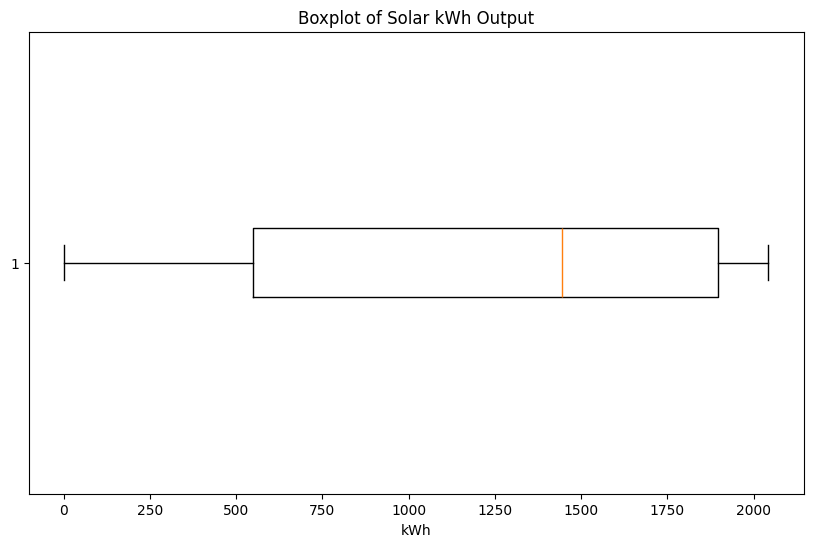

,kwh
count,7907.000000
mean,1222.790435
std,707.659230
min,0.000000
25%,547.675800
50%,1444.772000
75%,1897.269400
max,2043.015400


In [554]:
# Display summary statistics and boxplot to identify outliers in the 'kwh' column
solar_stats = solar_data.describe()

# Creating a boxplot to visualize outliers in the 'kwh' column
plt.figure(figsize=(10, 6))
plt.boxplot(solar_data['kwh'], vert=False)
plt.title('Boxplot of Solar kWh Output')
plt.xlabel('kWh')
plt.show()

solar_stats


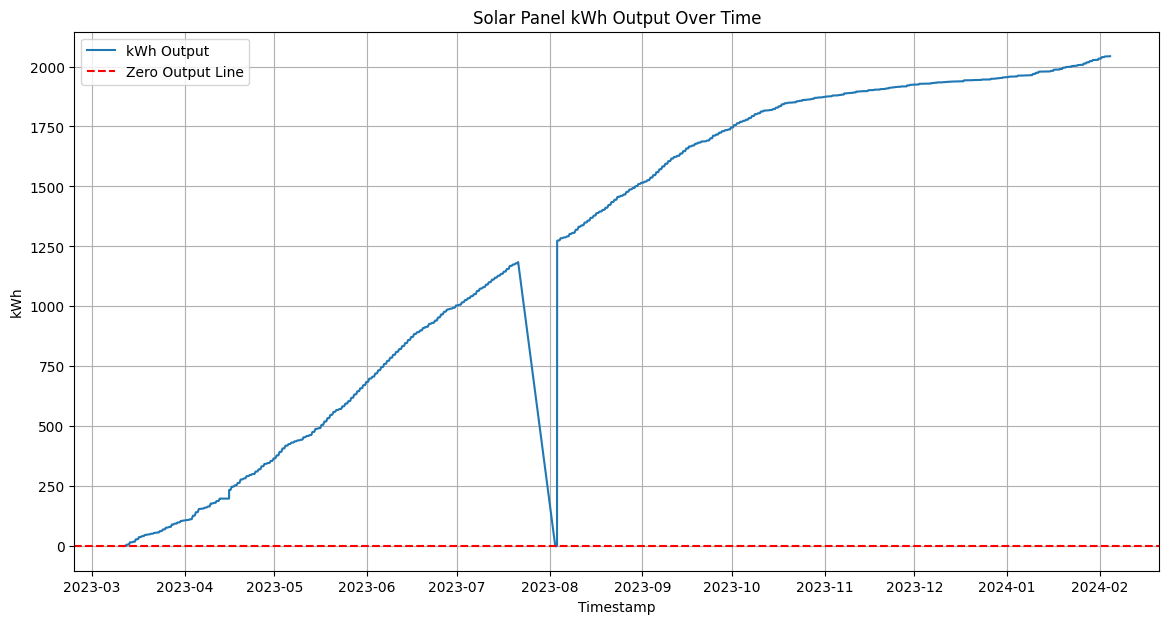

In [555]:
# Convert 'timestamp' to datetime for better handling
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'], utc=True)

# Plotting kWh output to observe zero values distribution over time
plt.figure(figsize=(14, 7))
plt.plot(solar_data['timestamp'], solar_data['kwh'], label='kWh Output')
plt.title('Solar Panel kWh Output Over Time')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.axhline(0, color='red', linestyle='--', label='Zero Output Line')
plt.grid(True)
plt.legend()
plt.show()


In [556]:
# Load the sunrise-sunset data
sunrise_sunset_data = pd.read_excel('../DATA/sunrise-sunset.xlsx')

# Convert the 'datum' to datetime and extract the date part for merging
sunrise_sunset_data['datum'] = pd.to_datetime(sunrise_sunset_data['datum']).dt.date

# Display the first few rows and column names to ensure correct loading and transformation
sunrise_sunset_columns = sunrise_sunset_data.columns
sunrise_sunset_head = sunrise_sunset_data.head()

sunrise_sunset_columns, sunrise_sunset_head


(Index(['datum', 'Opkomst', 'Op ware middag', 'Ondergang'], dtype='object'),
         datum   Opkomst Op ware middag Ondergang
 0  2023-01-01  08:45:00       12:46:00  16:47:00
 1  2023-01-02  08:45:00       12:46:00  16:48:00
 2  2023-01-03  08:45:00       12:47:00  16:49:00
 3  2023-01-04  08:44:00       12:47:00  16:51:00
 4  2023-01-05  08:44:00       12:48:00  16:52:00)

In [557]:
# Extract the date from the solar data 'timestamp' for merging
solar_data['date'] = solar_data['timestamp'].dt.date

# Ensure 'Opkomst' and 'Ondergang' are timedeltas for merging and comparison
sunrise_sunset_data['Opkomst'] = pd.to_timedelta(sunrise_sunset_data['Opkomst'].astype(str))
sunrise_sunset_data['Ondergang'] = pd.to_timedelta(sunrise_sunset_data['Ondergang'].astype(str))

# Merge solar data with sunrise-sunset data on 'date'
merged_data = pd.merge(solar_data, sunrise_sunset_data, left_on='date', right_on='datum', how='left')

# Calculate the datetime of sunrise and sunset for each entry in the solar data
merged_data['sunrise_datetime'] = merged_data['timestamp'].dt.normalize() + merged_data['Opkomst']
merged_data['sunset_datetime'] = merged_data['timestamp'].dt.normalize() + merged_data['Ondergang']

# Display the first few rows to ensure the merge and calculations are correct
merged_data[['timestamp', 'kwh', 'sunrise_datetime', 'sunset_datetime']].head()


,timestamp,kwh,sunrise_datetime,sunset_datetime
0,2023-03-11 15:00:10.160454+00:00,0.54,2023-03-11 07:06:00+00:00,2023-03-11 18:40:00+00:00
1,2023-03-11 16:00:10.217795+00:00,1.02,2023-03-11 07:06:00+00:00,2023-03-11 18:40:00+00:00
2,2023-03-11 17:00:10.284064+00:00,1.17,2023-03-11 07:06:00+00:00,2023-03-11 18:40:00+00:00
3,2023-03-11 18:00:10.224836+00:00,1.18,2023-03-11 07:06:00+00:00,2023-03-11 18:40:00+00:00
4,2023-03-11 19:00:10.201847+00:00,1.18,2023-03-11 07:06:00+00:00,2023-03-11 18:40:00+00:00


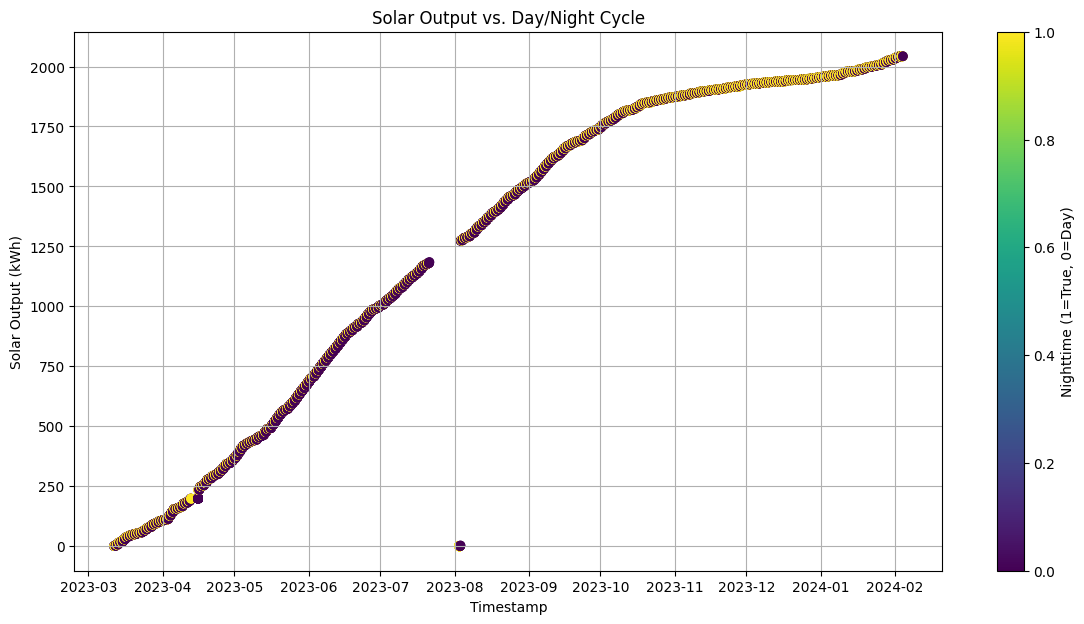

(305, 305)

In [558]:
# Mark entries where the solar output is zero and it is nighttime (outside daylight hours)
merged_data['is_night'] = (merged_data['timestamp'] < merged_data['sunrise_datetime']) | (merged_data['timestamp'] > merged_data['sunset_datetime'])
merged_data['zero_output_night'] = (merged_data['kwh'] == 0) & merged_data['is_night']

# Filter data to show only zero output entries
zero_output_data = merged_data[merged_data['kwh'] == 0]

# Plot to visualize zero outputs against daylight hours
plt.figure(figsize=(14, 7))
plt.scatter(merged_data['timestamp'], merged_data['kwh'], c=merged_data['is_night'], cmap='viridis', label='Daylight vs. Night')
plt.colorbar(label='Nighttime (1=True, 0=Day)')
plt.title('Solar Output vs. Day/Night Cycle')
plt.xlabel('Timestamp')
plt.ylabel('Solar Output (kWh)')
plt.grid(True)
plt.show()

# Count the instances where zero output occurs during nighttime
zero_output_night_count = merged_data['zero_output_night'].sum()
total_zero_output_count = zero_output_data.shape[0]

zero_output_night_count, total_zero_output_count


In [559]:
# Filter the data to include only nighttime records across a broader range of days around the suspicious period
extended_period_start = pd.Timestamp('2023-08-01 20:00:00+02:00', tz='Europe/Brussels')
extended_period_end = pd.Timestamp('2023-08-05 05:00:00+02:00', tz='Europe/Brussels')

# Filter merged data for this extended period and for nighttime only
extended_night_data = merged_data[(merged_data['timestamp'] >= extended_period_start) &
                                  (merged_data['timestamp'] <= extended_period_end) &
                                  (merged_data['is_night'])]

# Analyze the solar output during these nighttime periods
extended_night_data_analysis = extended_night_data[['timestamp', 'kwh', 'sunrise_datetime', 'sunset_datetime', 'is_night']]
extended_night_data_analysis.describe(), extended_night_data_analysis.head(20)


(               kwh
 count   320.000000
 mean     55.928169
 std     261.884103
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       0.000000
 max    1284.270400,
                             timestamp  kwh          sunrise_datetime  \
 3166 2023-08-02 21:27:27.552237+00:00  0.0 2023-08-02 06:10:00+00:00   
 3167 2023-08-02 21:27:31.115179+00:00  0.0 2023-08-02 06:10:00+00:00   
 3168 2023-08-02 21:27:34.874253+00:00  0.0 2023-08-02 06:10:00+00:00   
 3169 2023-08-02 21:27:38.515292+00:00  0.0 2023-08-02 06:10:00+00:00   
 3170 2023-08-02 21:27:42.783623+00:00  0.0 2023-08-02 06:10:00+00:00   
 3171 2023-08-02 21:27:46.498620+00:00  0.0 2023-08-02 06:10:00+00:00   
 3172 2023-08-02 21:27:50.126480+00:00  0.0 2023-08-02 06:10:00+00:00   
 3173 2023-08-02 21:27:53.809089+00:00  0.0 2023-08-02 06:10:00+00:00   
 3174 2023-08-02 21:27:57.632530+00:00  0.0 2023-08-02 06:10:00+00:00   
 3175 2023-08-02 21:28:01.291055+00:00  0.0 2023-08-02 06:10:00+00:00   
 3176 2023-08-02

In [560]:
import pandas as pd

# Load your interpolated data
data = pd.read_csv('../DATA/solar_interpolated.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True)
data.set_index('timestamp', inplace=True)

# Generate a date range for missing timestamps
missing_timestamps = pd.date_range(start='2023-07-21 12:00:11+00:00', end='2023-08-03 13:00:12+00:00', freq='h')

# Reindex the DataFrame to include the new date range
data = data.reindex(missing_timestamps, method='nearest', tolerance='1h')

# Interpolate the missing values linearly
data_interpolated = data.interpolate(method='time')

# Reset index to turn the datetime index back into a column
data_interpolated.reset_index(inplace=True)
data_interpolated.rename(columns={'index': 'timestamp'}, inplace=True)

# Save the data
data_interpolated.to_csv('../DATA/solar_interpolated_full.csv', index=False)

print("Data generation and interpolation complete. Data saved.")



Data generation and interpolation complete. Data saved.


In [561]:
import pandas as pd

# Load the main and interpolated data
main_data = pd.read_csv('../DATA/solar_filtered.csv')
interpolated_data = pd.read_csv('../DATA/solar_interpolated_full.csv')

# Convert timestamps to datetime
main_data['timestamp'] = pd.to_datetime(main_data['timestamp'])
interpolated_data['timestamp'] = pd.to_datetime(interpolated_data['timestamp'])

# Dropping the original rows where the new data will be inserted
start_time = pd.to_datetime('2023-07-21 14:00:11+02:00', utc=True)
end_time = pd.to_datetime('2023-08-03 15:00:12+02:00', utc=True)
mask = (main_data['timestamp'] > start_time) & (main_data['timestamp'] < end_time)
filtered_main_data = main_data[~mask]


# Concatenate the old data without the dropped rows and the new interpolated data
combined_data = pd.concat([filtered_main_data, interpolated_data])

# Sort the data by timestamp
combined_data.sort_values('timestamp', inplace=True)

# Remove any potential duplicates and reset the index
final_data = combined_data.drop_duplicates(subset='timestamp').reset_index(drop=True)

# Save the final data to a new CSV file
final_data.to_csv('../DATA/solar_final.csv', index=False)
print("Data merged and saved successfully.")
solar_data = pd.read_csv('../DATA/solar_final.csv')




Data merged and saved successfully.


C:\Users\tomde\AppData\Local\Temp\ipykernel_17484\1668006647.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main_data['timestamp'] = pd.to_datetime(main_data['timestamp'])


C:\Users\tomde\AppData\Local\Temp\ipykernel_17484\3986960475.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  plt.plot(pd.to_datetime(solar_data['timestamp'], format='mixed'), solar_data['kwh'])


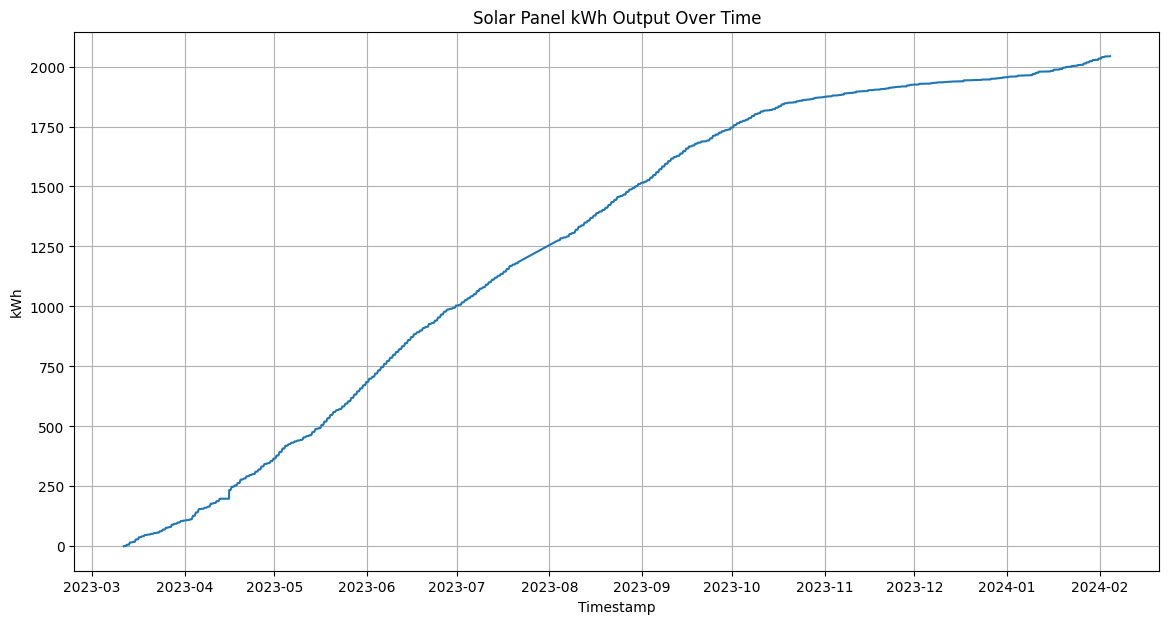

In [562]:
import matplotlib.pyplot as plt

# Plotting the kWh output to inspect for any obvious outliers or unusual patterns
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(solar_data['timestamp'], format='mixed'), solar_data['kwh'])
plt.title('Solar Panel kWh Output Over Time')
plt.xlabel('Timestamp')
plt.ylabel('kWh')
plt.grid(True)
plt.show()

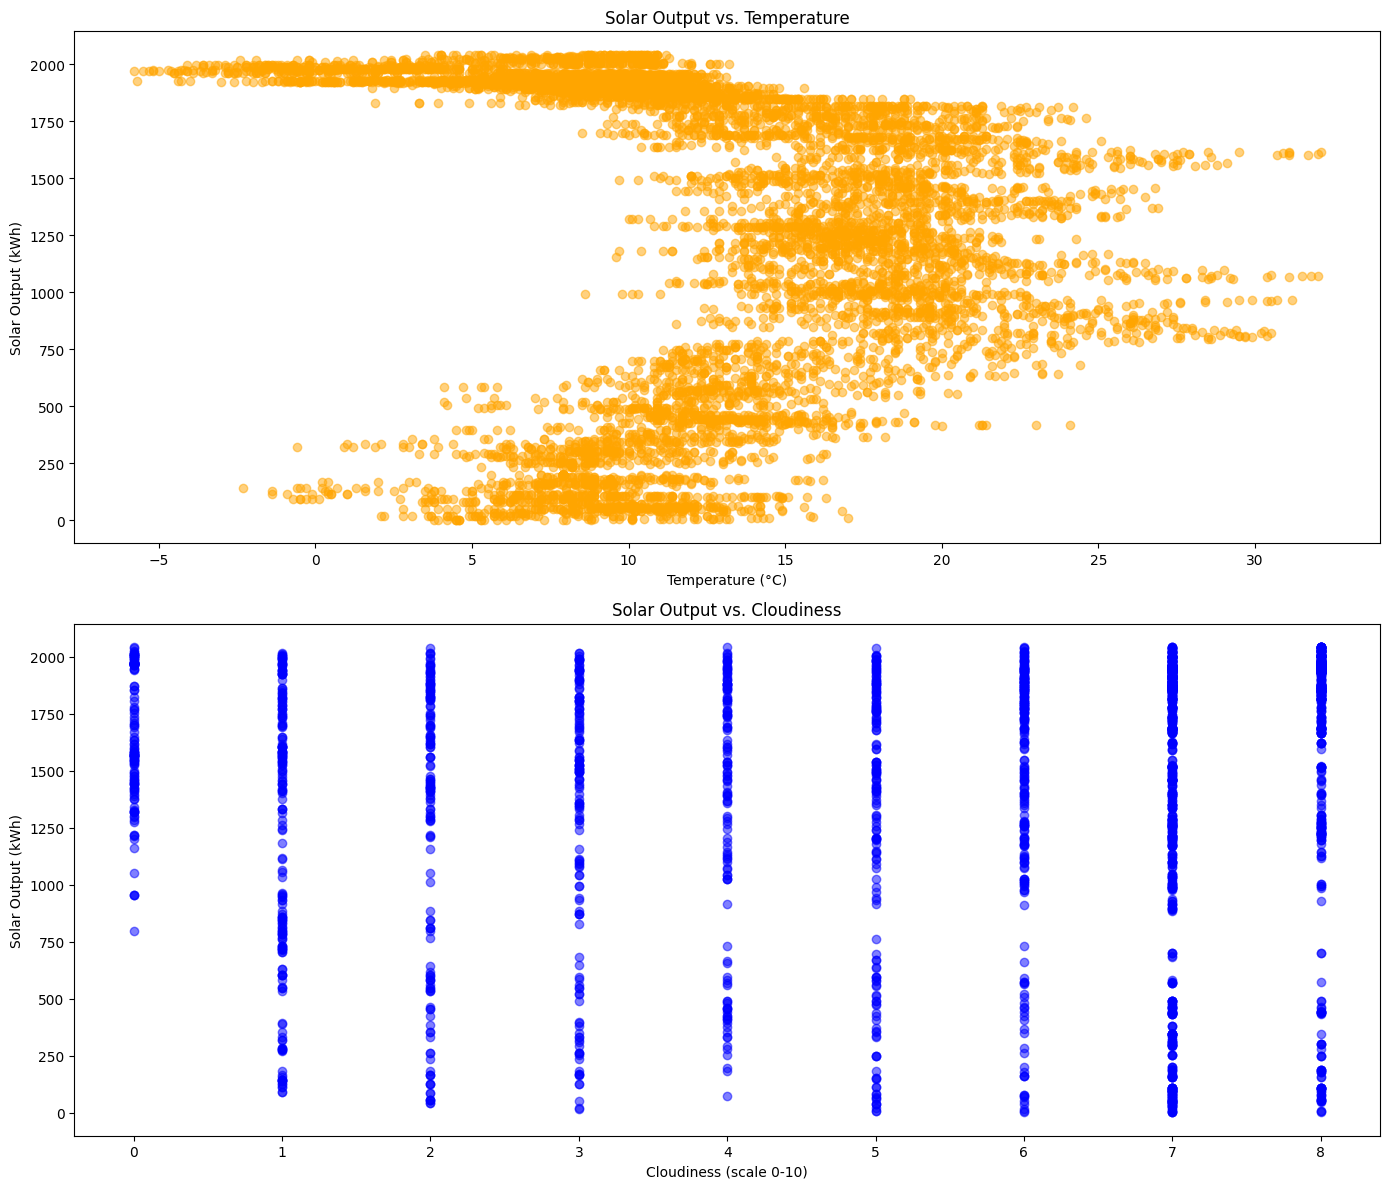

In [563]:
# Convert 'timestamp' columns to datetime format
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'],format='mixed', utc=True)
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], utc=True)


# Since the weather data may not align perfectly with solar data timestamps, use 'merge_asof' to align them closely based on time.
# First, sort the data by timestamp
solar_data_sorted = solar_data.sort_values('timestamp')
weather_data_sorted = weather_data.sort_values('timestamp')

# Merge the closest timestamps
merged_data = pd.merge_asof(solar_data_sorted, weather_data_sorted, on='timestamp', direction='nearest')

# Plot solar output vs. temperature and cloud cover
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Temperature vs. Solar Output
axs[0].scatter(merged_data['temp'], merged_data['kwh'], alpha=0.5, color='orange')
axs[0].set_title('Solar Output vs. Temperature')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Solar Output (kWh)')

# Cloudiness vs. Solar Output
axs[1].scatter(merged_data['cloudiness'], merged_data['kwh'], alpha=0.5, color='blue')
axs[1].set_title('Solar Output vs. Cloudiness')
axs[1].set_xlabel('Cloudiness (scale 0-10)')
axs[1].set_ylabel('Solar Output (kWh)')

plt.tight_layout()
plt.show()

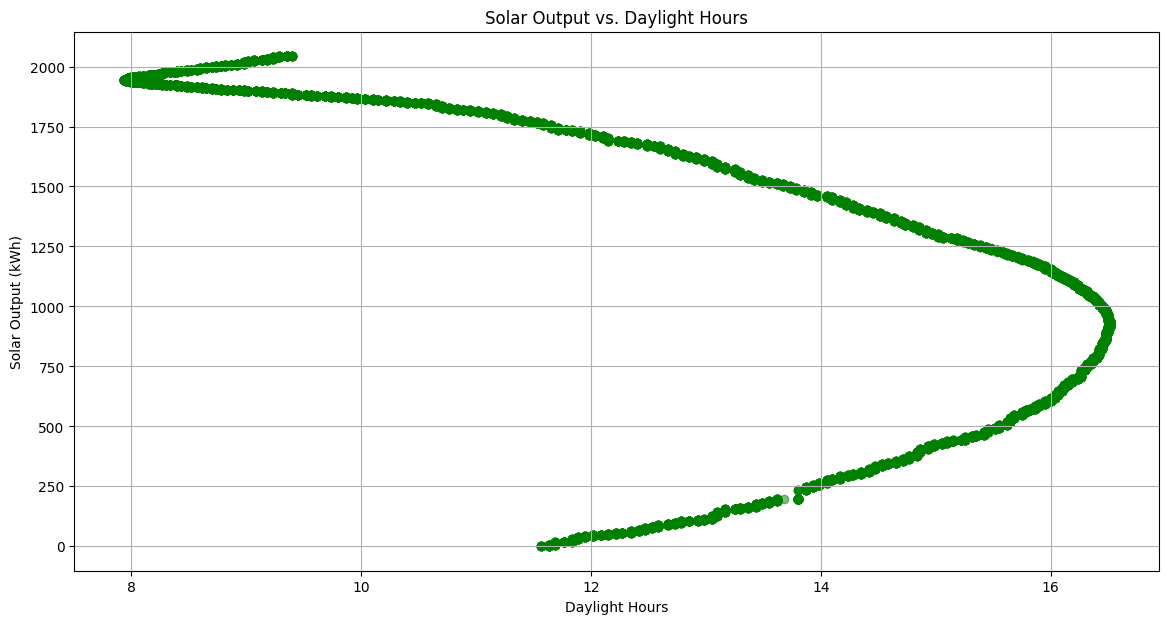

In [564]:
# Convert 'datum' column to datetime format
sunrise_sunset_data['datum'] = pd.to_datetime(sunrise_sunset_data['datum'])


# Merge solar data with sunrise-sunset data to include daylight hours
# We need to merge based on the date extracted from the timestamp of solar data and the 'datum' from sunrise-sunset data
solar_data_sorted['date'] = solar_data_sorted['timestamp'].dt.date
sunrise_sunset_data['date'] = sunrise_sunset_data['datum'].dt.date

# Calculate daylight hours for each day
sunrise_sunset_data['daylight_hours'] = (sunrise_sunset_data['Ondergang'] - sunrise_sunset_data['Opkomst']).dt.total_seconds() / 3600


# Merging based on the date
merged_daylight_data = pd.merge(solar_data_sorted, sunrise_sunset_data[['date', 'daylight_hours']], on='date', how='left')

# Plotting Solar Output vs. Daylight Hours
plt.figure(figsize=(14, 7))
plt.scatter(merged_daylight_data['daylight_hours'], merged_daylight_data['kwh'], alpha=0.5, color='green')
plt.title('Solar Output vs. Daylight Hours')
plt.xlabel('Daylight Hours')
plt.ylabel('Solar Output (kWh)')
plt.grid(True)
plt.show()

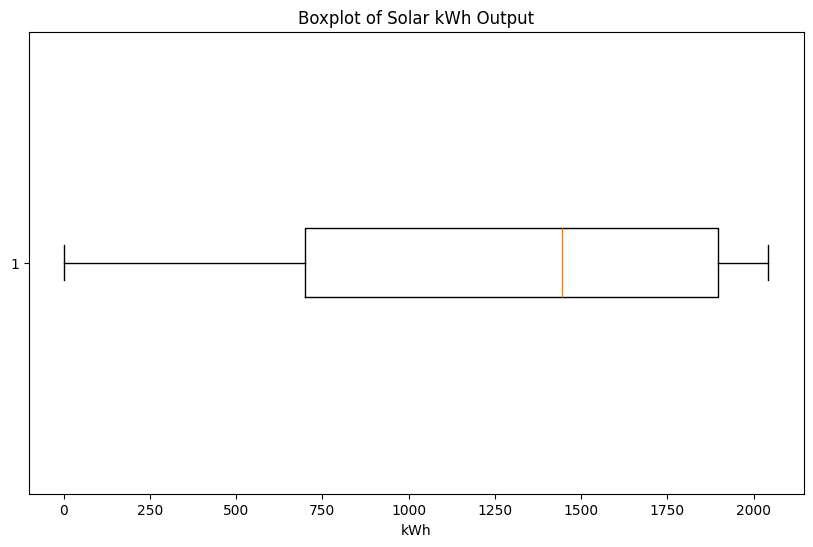

,kwh
count,7908.000000
mean,1271.281548
std,662.870430
min,0.540000
25%,698.739000
50%,1444.640250
75%,1897.269400
max,2043.015400


In [565]:
# Display summary statistics and boxplot to identify outliers in the 'kwh' column
solar_stats = solar_data.describe()

# Creating a boxplot to visualize outliers in the 'kwh' column
plt.figure(figsize=(10, 6))
plt.boxplot(solar_data['kwh'], vert=False)
plt.title('Boxplot of Solar kWh Output')
plt.xlabel('kWh')
plt.show()

solar_stats

In [566]:
# Convert the 'timestamp' column to datetime
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'], utc=True)

# Sort the data by 'timestamp' just in case it's not already sorted
solar_data.sort_values('timestamp', inplace=True)

# Calculate the difference in 'kwh' to find the amount generated each hour (assuming data is hourly)
solar_data['daily_kwh'] = solar_data['kwh'].diff()

# Handle the first row which will have a NaN value after differencing
solar_data['daily_kwh'].iloc[0] = solar_data['kwh'].iloc[0]

# Display the first few rows to verify the changes
solar_data.head()


C:\Users\tomde\AppData\Local\Temp\ipykernel_17484\3211583323.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  solar_data['daily_kwh'].iloc[0] = solar_data['kwh'].iloc[0]
C:\Users\tomde\AppData\Local\Temp\ipykernel_17484\3211583323.py:11:

,timestamp,kwh,daily_kwh
0,2023-03-11 15:00:10.160454+00:00,0.54,0.54
1,2023-03-11 16:00:10.217795+00:00,1.02,0.48
2,2023-03-11 17:00:10.284064+00:00,1.17,0.15
3,2023-03-11 18:00:10.224836+00:00,1.18,0.01
4,2023-03-11 19:00:10.201847+00:00,1.18,0.00


In [567]:
# Save the modified dataset to a new CSV file
new_csv_path = '../DATA/solar_daily_kwh.csv'
solar_data.to_csv(new_csv_path, index=False)

new_csv_path


'../DATA/solar_daily_kwh.csv'

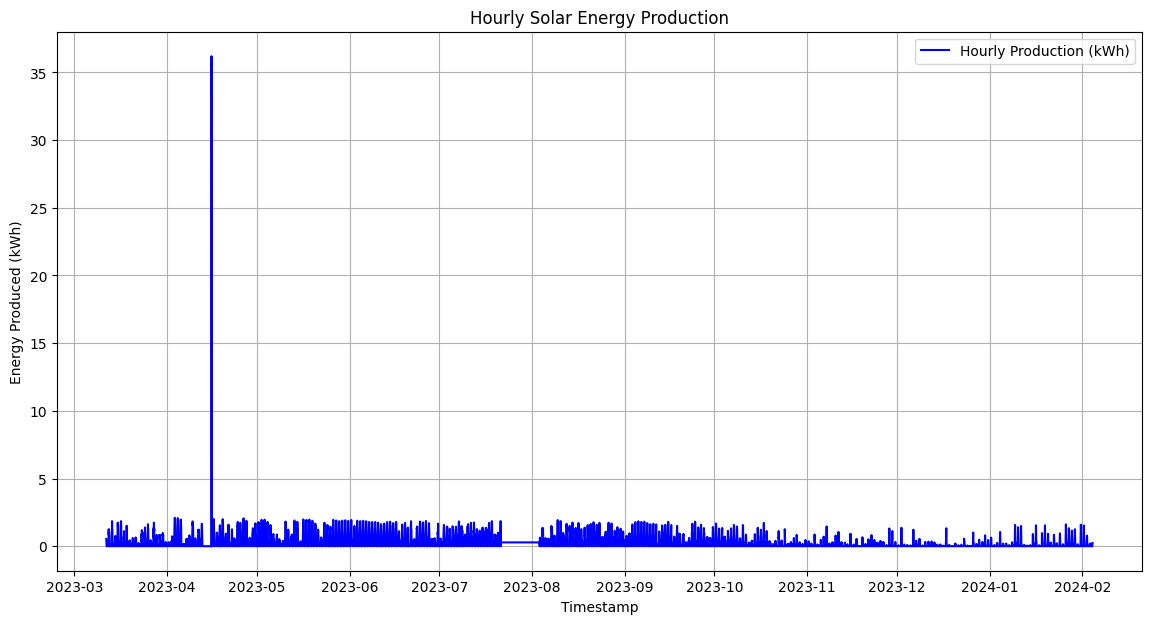

In [568]:
import matplotlib.pyplot as plt

# Plot the daily kWh production over time
plt.figure(figsize=(14, 7))
plt.plot(solar_data['timestamp'], solar_data['daily_kwh'], label='Hourly Production (kWh)', color='blue')
plt.title('Hourly Solar Energy Production')
plt.xlabel('Timestamp')
plt.ylabel('Energy Produced (kWh)')
plt.grid(True)
plt.legend()
plt.show()

# 2023-04-15 20:10:24.384263+00:00,234.7162,36.19449999999998



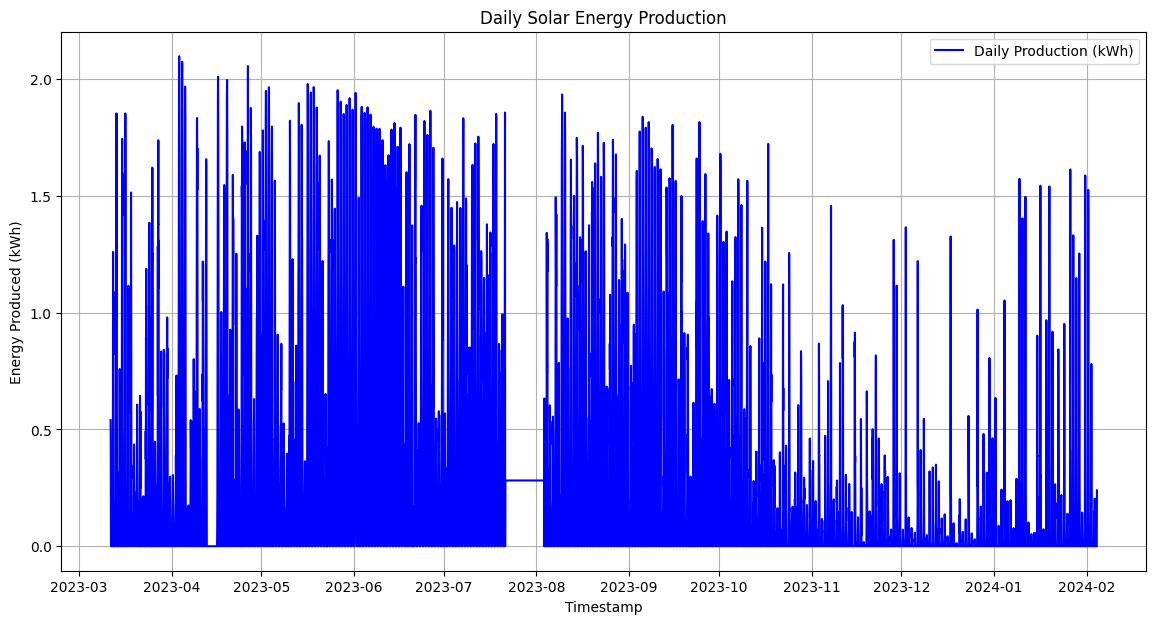

In [569]:
# delete the row with the timestamp '2023-04-15 20:10:24.384263+00:00'
solar_data = solar_data[solar_data['timestamp'] != '2023-04-15 20:10:24.384263+00:00']

# subtract 36.19449999999998 from every row in the 'kwh' column starting from the row with the timestamp '2023-04-15 21:00:10.161864+00:00'
solar_data.loc[solar_data['timestamp'] >= '2023-04-15 21:00:10.161864+00:00', 'kwh'] -= 36.19449999999998

import matplotlib.pyplot as plt

# Plot daily_kwh with a graph
plt.figure(figsize=(14, 7))
plt.plot(solar_data['timestamp'], solar_data['daily_kwh'], label='Daily Production (kWh)', color='blue')
plt.title('Daily Solar Energy Production')
plt.xlabel('Timestamp')
plt.ylabel('Energy Produced (kWh)')
plt.grid(True)
plt.legend()


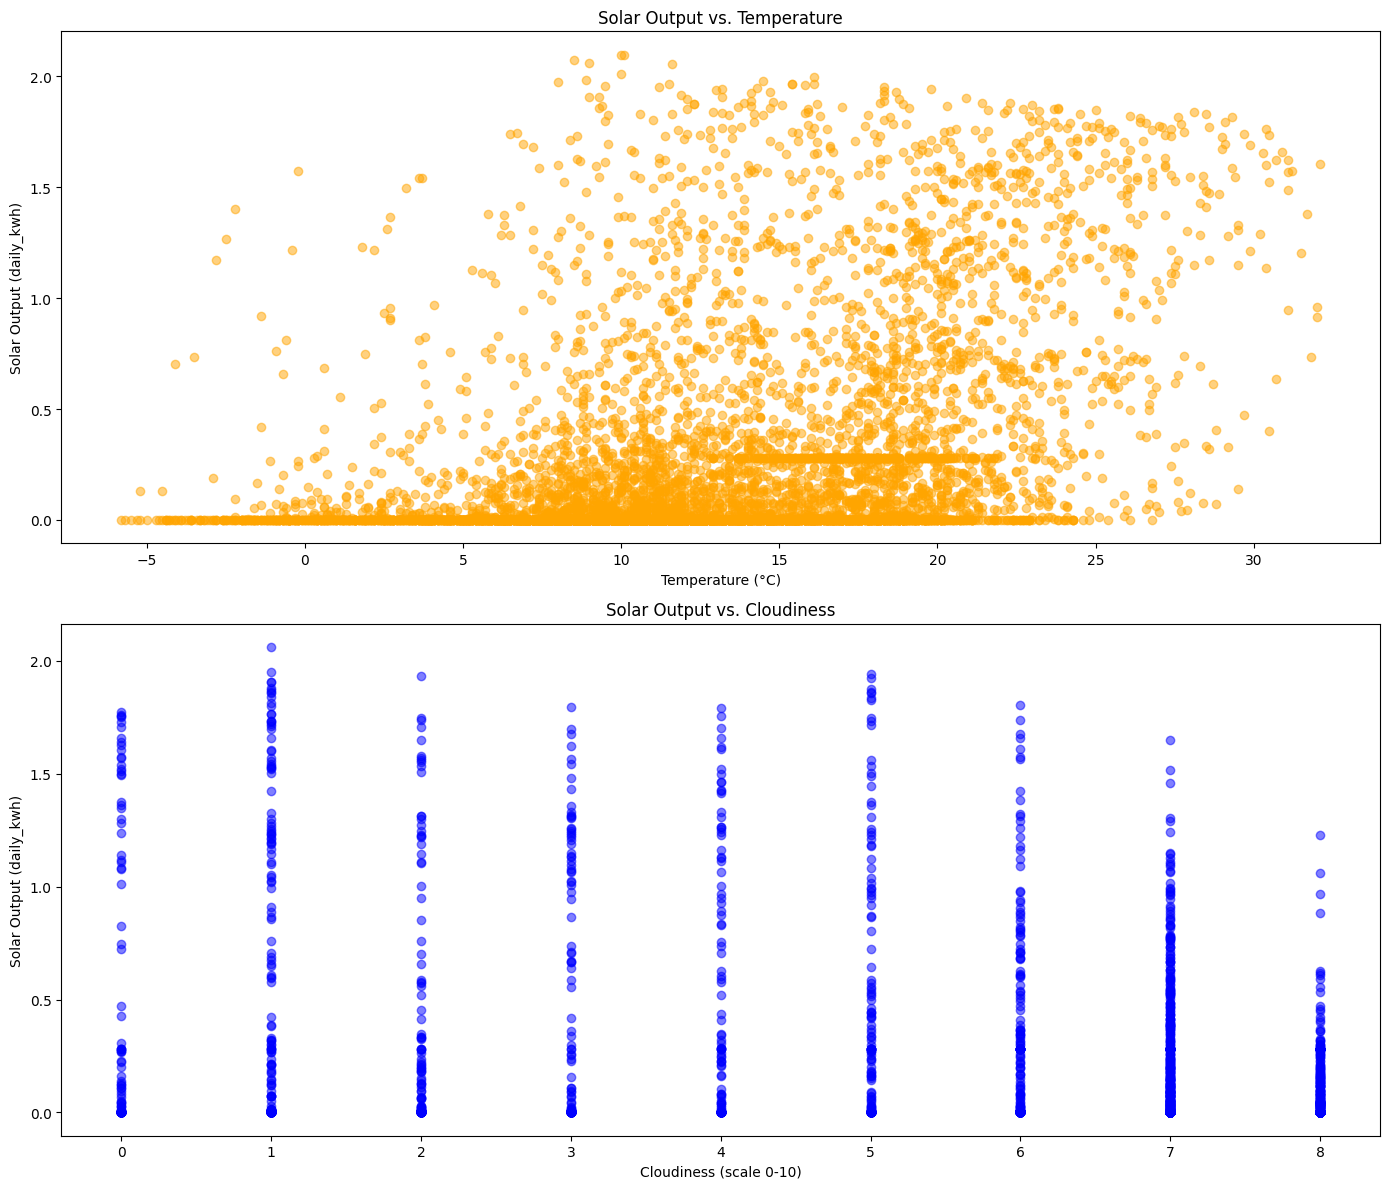

In [570]:
# Convert 'timestamp' columns to datetime format
solar_data['timestamp'] = pd.to_datetime(solar_data['timestamp'],format='mixed', utc=True)
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'], utc=True)


# Since the weather data may not align perfectly with solar data timestamps, use 'merge_asof' to align them closely based on time.
# First, sort the data by timestamp
solar_data_sorted = solar_data.sort_values('timestamp')
weather_data_sorted = weather_data.sort_values('timestamp')

# Merge the closest timestamps
merged_data = pd.merge_asof(solar_data_sorted, weather_data_sorted, on='timestamp', direction='nearest')

# Plot solar output vs. temperature and cloud cover
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Temperature vs. Solar Output
axs[0].scatter(merged_data['temp'], merged_data['daily_kwh'], alpha=0.5, color='orange')
axs[0].set_title('Solar Output vs. Temperature')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Solar Output (daily_kwh)')

# Cloudiness vs. Solar Output
axs[1].scatter(merged_data['cloudiness'], merged_data['daily_kwh'], alpha=0.5, color='blue')
axs[1].set_title('Solar Output vs. Cloudiness')
axs[1].set_xlabel('Cloudiness (scale 0-10)')
axs[1].set_ylabel('Solar Output (daily_kwh)')

plt.tight_layout()
plt.show()

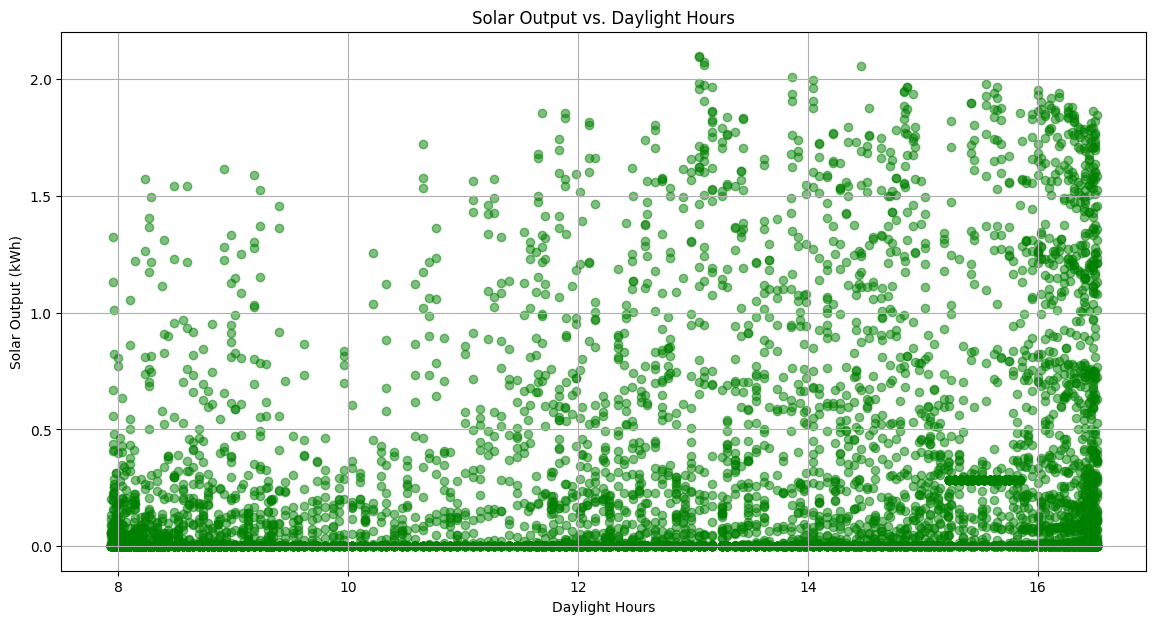

In [571]:
# Convert 'datum' column to datetime format
sunrise_sunset_data['datum'] = pd.to_datetime(sunrise_sunset_data['datum'])


# Merge solar data with sunrise-sunset data to include daylight hours
# We need to merge based on the date extracted from the timestamp of solar data and the 'datum' from sunrise-sunset data
solar_data_sorted['date'] = solar_data_sorted['timestamp'].dt.date
sunrise_sunset_data['date'] = sunrise_sunset_data['datum'].dt.date

# Calculate daylight hours for each day
sunrise_sunset_data['daylight_hours'] = (sunrise_sunset_data['Ondergang'] - sunrise_sunset_data['Opkomst']).dt.total_seconds() / 3600


# Merging based on the date
merged_daylight_data = pd.merge(solar_data_sorted, sunrise_sunset_data[['date', 'daylight_hours']], on='date', how='left')

# Plotting Solar Output vs. Daylight Hours
plt.figure(figsize=(14, 7))
plt.scatter(merged_daylight_data['daylight_hours'], merged_daylight_data['daily_kwh'], alpha=0.5, color='green')
plt.title('Solar Output vs. Daylight Hours')
plt.xlabel('Daylight Hours')
plt.ylabel('Solar Output (kWh)')
plt.grid(True)
plt.show()

In [572]:
solar_hourly_data = pd.read_csv('../DATA/solar_daily_kwh.csv')

# Convert the 'timestamp' column to datetime
solar_hourly_data['timestamp'] = pd.to_datetime(solar_hourly_data['timestamp'],format='mixed', utc=True)

# Set the timestamp as the index
solar_hourly_data.set_index('timestamp', inplace=True)

# Group by date and sum the kWh readings for each day
daily_kwh = solar_hourly_data['daily_kwh'].resample('D').sum()

# Reset the index to turn the date index back to a regular column
daily_kwh = daily_kwh.reset_index()

# Rename the columns appropriately
daily_kwh.columns = ['date', 'total_daily_kwh']

# Show the resulting DataFrame
daily_kwh.head()

# Save the daily kWh data to a new CSV file
daily_kwh.to_csv('../DATA/solar_daily_kwh_total.csv', index=False)


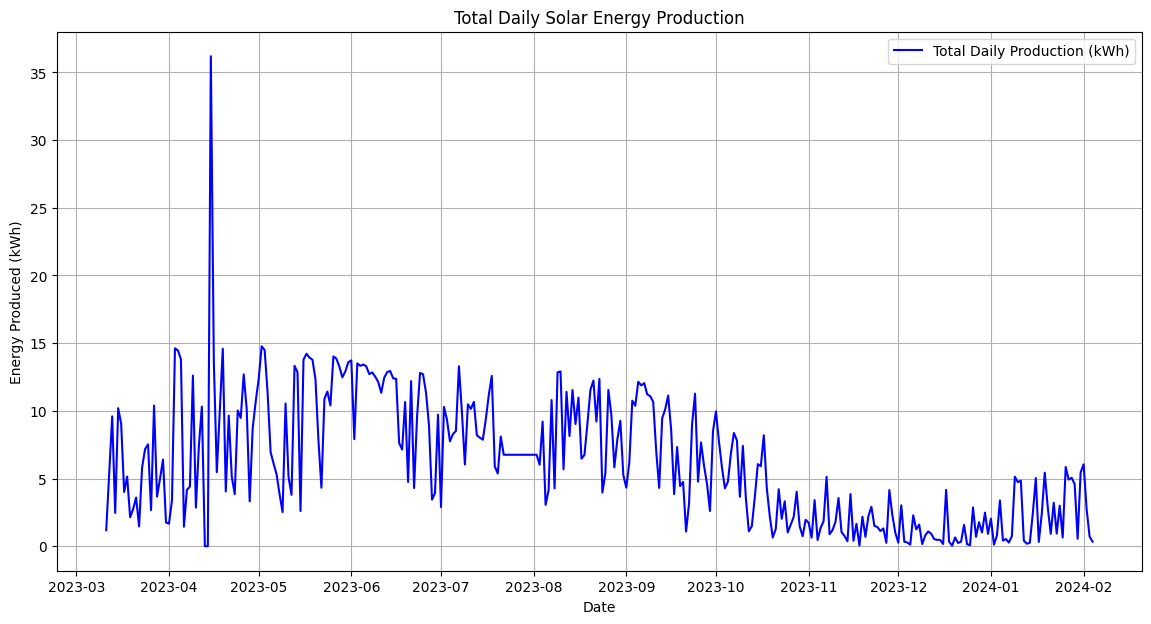

In [573]:
# graph for solar_daily_kwh_total.csv
import matplotlib.pyplot as plt

# Load the daily kWh data
daily_kwh = pd.read_csv('../DATA/solar_daily_kwh_total.csv')

# Convert the 'date' column to datetime
daily_kwh['date'] = pd.to_datetime(daily_kwh['date'])

# Plot the total daily kWh production over time
plt.figure(figsize=(14, 7))
plt.plot(daily_kwh['date'], daily_kwh['total_daily_kwh'], label='Total Daily Production (kWh)', color='blue')
plt.title('Total Daily Solar Energy Production')
plt.xlabel('Date')
plt.ylabel('Energy Produced (kWh)')
plt.grid(True)
plt.legend()
plt.show()
